# Project: Hotels Scores and Sold Nights.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Quest">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction




> **Descriptions:** This dataset has information about 99 different hotels and the main target is to gather hotels info using "rapid API" and make EDA to get insights from data and answer the questions.

 **Dataset columns descriptions:**
 
- **Hotel ID**: Hotel Identification. 
- **Hotel Name**. 
- **Country**: Country Name. 
- **Score**: Evaluate the key features, amenities and quality of the services provided by a hotel. 
- **Night Sold**: The number of rooms sold in a specified time period. 
- **Theme**: Coastal, Nature, Contemporary, Palace, Safari or Island.

<a id='Quest'></a>
## **Questions:**


* 1 - Which Country has the highest average hotel score? (top 10)
* 2 - Which Country has the most average sold nights? (top 10)
* 3 - Which Country has the most total sold nights? (top 10)
* 4 - Which Theme has the highest average hotel score?  
* 5 - Which Theme has the most average sold nights? 
* 6 - Which Theme has the most total sold nights?
* 7 - Is there any correlation between hotel score and sold nights?

### importing libraries that will be used to investigate Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import time
sns.set_style("whitegrid")
import requests

<a id='wrangling'></a>
## Data Wrangling

 **This is a three step process:**

*  Gathering the data from Dataset and investegate it trying to understand more details about it. 


*  Assessing data to identify any issues with data types, structure, or quality.


*  Cleaning data by changing data types, replacing values, removing unnecessary data and modifying Dataset for easy and fast analysis.


### Gathering Data

In [2]:
# loading CSV files in to 3 Dataframes  //names and data //

names = pd.read_csv("HotelNames.csv", encoding="latin-1")
data = pd.read_csv("HotelsData.csv", encoding="latin-1")

In [3]:
#checking 5 rows sample from Dataframes

names.head()

,Hotel Name
0,Mahali Mzuri
1,Nayara Tented Group
2,The Opposite House
3,Capella Bangkok
4,Capella Ubud


In [4]:
data.head()

,Hotel ID,Score,Night Sold,Theme
0,51515565,63%,12,Safari
1,226817781,24%,29,Nature
2,13728501,14%,99,Contemporary
3,242822709,13%,101,Contemporary
4,177854889,62%,23,Nature


In [83]:
def get_hotels_info(df, col):
    lst = []
    method = 'GET'
    url = 'https://hotel-price-aggregator.p.rapidapi.com/search'
    headers = {
    'X-RapidAPI-Key': '44efed8eebmsh321f81812bbffe1p17fb17jsn8744b93a9989',
    'X-RapidAPI-Host': 'hotel-price-aggregator.p.rapidapi.com'
  }

    for i in df[col]:
        params= {"q": i}
        r = requests.get(url = url, params = params, headers= headers)
        response = r.json()
        try:
            lst.append(response[0])
        except:
            lst.append(response)
            
        time.sleep(3)
        
    return lst

In [84]:
%%time

hotel_info = get_hotels_info(names, "Hotel Name")

CPU times: user 3.55 s, sys: 222 ms, total: 3.77 s
Wall time: 9min 25s


In [85]:
hotel_info

[{'name': 'Mahali Mzuri, Maasai Mara National Reserve, Kenya',
  'shortName': 'Mahali Mzuri',
  'address': {'city': 'Maasai Mara National Reserve',
   'country': 'Kenya',
   'address': 'Olare Motorogi Conservancy'},
  'coordenates': '-1.273746,35.22279',
  'hotelId': '51515565'},
 {'name': 'Nayara Tented Camp, La Fortuna, Costa Rica',
  'shortName': 'Nayara Tented Camp',
  'address': {'city': 'La Fortuna',
   'country': 'Costa Rica',
   'address': 'La Palma 500 Mtr Northwest'},
  'coordenates': '10.504969,-84.68901',
  'hotelId': '226817781'},
 {'name': 'The Opposite House, Beijing, China',
  'shortName': 'The Opposite House',
  'address': {'city': 'Beijing',
   'country': 'China',
   'address': 'Building 1, No.11 Sanlitun Road, Chaoyang district'},
  'coordenates': '39.93775,116.45483',
  'hotelId': '13728501'},
 {'name': 'Capella Bangkok, Bangkok, Thailand',
  'shortName': 'Capella Bangkok',
  'address': {'city': 'Bangkok',
   'country': 'Thailand',
   'address': '300/2 Charoenkrung 

In [86]:
len(hotel_info)

99

In [88]:
country = []
hotelid = []
for i in hotel_info:
    country.append(i["address"]["country"])
    hotelid.append(i["hotelId"])

In [100]:
names["Hotel ID"] = hotelid
names["Country"] = country
names.head()

,Hotel Name,Country,Hotel ID
0,Mahali Mzuri,Kenya,51515565
1,Nayara Tented Group,Costa Rica,226817781
2,The Opposite House,China,13728501
3,Capella Bangkok,Thailand,242822709
4,Capella Ubud,Indonesia,177854889


### Assessing Data

In [6]:
#checking Dataframe basic informations (columns names, number of values, data types ......)

names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hotel Name  99 non-null     object
 1   Country     99 non-null     object
 2   Hotel ID    99 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.4+ KB


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hotel ID    99 non-null     int64 
 1   Score       99 non-null     object
 2   Night Sold  99 non-null     int64 
 3   Theme       99 non-null     object
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [8]:
#checking Dataframe shape (number of rows and columns)

names.shape

(99, 3)

In [9]:
data.shape

(99, 4)

In [10]:
#checking more information and descriptive statistics

names.describe()

,Hotel ID
count,9.900000e+01
mean,4.232649e+07
std,6.763819e+07
min,9.516690e+05
25%,3.617109e+06
50%,6.903177e+06
75%,4.422166e+07
max,2.428227e+08


In [11]:
data.describe()

,Hotel ID,Night Sold
count,9.900000e+01,99.000000
mean,4.232649e+07,96.010101
std,6.763819e+07,95.728836
min,9.516690e+05,4.000000
25%,3.617109e+06,26.500000
50%,6.903177e+06,67.000000
75%,4.422166e+07,123.000000
max,2.428227e+08,469.000000


In [12]:
# checking for NaN values patients

names.isnull().sum()

Hotel Name    0
Country       0
Hotel ID      0
dtype: int64

In [13]:
#checking for duplicated rows 

data.isnull().sum()

Hotel ID      0
Score         0
Night Sold    0
Theme         0
dtype: int64

In [14]:
# checking for duplicated with subset 

names.duplicated().sum()

0

In [15]:
data.duplicated().sum()

0

In [16]:
#checking number of unique values

names.nunique()

Hotel Name    99
Country       40
Hotel ID      99
dtype: int64

In [17]:
data.nunique()

Hotel ID      99
Score         65
Night Sold    80
Theme          6
dtype: int64

In [18]:
names.Country.value_counts()

India               12
Mexico               7
South Africa         5
Italy                5
France               5
England              4
Maldives             4
Thailand             4
Indonesia            4
Greece               4
Costa Rica           3
Turkey               3
Kenya                3
Peru                 3
California           2
Jamaica              2
Botswana             2
New York             2
St. Lucia            2
China                2
French Polynesia     2
St. Barthelemy       1
Portugal             1
British Columbia     1
Switzerland          1
Singapore            1
Zambia               1
New Mexico           1
Japan                1
Zimbabwe             1
Wyoming              1
Illinois             1
Ecuador              1
Chile                1
New Hampshire        1
Brazil               1
Philippines          1
Quebec               1
Bahamas              1
Spain                1
Name: Country, dtype: int64

##  Cleaning Data

 
1. Merge names and data dataframes.
2. Remove space from columns names to make it easy to use.
3. Sort datafame columns.
4. Replace cities with contries.
5. Remove % sign from score column and change column data type into integer.

In [19]:
# make copy of origenal dataframes to clean them

names_clean = names.copy()
data_clean = data.copy()

#### 1. Merge names and data dataframes

##### Code

In [20]:
# Merge dataframes

hotels = names_clean.merge(data_clean, how="inner", on="Hotel ID")

##### Test

In [21]:
#confirm changes

hotels.head()

,Hotel Name,Country,Hotel ID,Score,Night Sold,Theme
0,Mahali Mzuri,Kenya,51515565,63%,12,Safari
1,Nayara Tented Group,Costa Rica,226817781,24%,29,Nature
2,The Opposite House,China,13728501,14%,99,Contemporary
3,Capella Bangkok,Thailand,242822709,13%,101,Contemporary
4,Capella Ubud,Indonesia,177854889,62%,23,Nature


In [22]:
hotels.shape

(99, 6)

#### 2. Remove space from columns names to make it easy to use.

##### Code

In [23]:
# Rename columns 

hotels.columns = hotels.columns.str.replace(" ", "_")

##### Test

In [24]:
#confirm changes

hotels.columns

Index(['Hotel_Name', 'Country', 'Hotel_ID', 'Score', 'Night_Sold', 'Theme'], dtype='object')

#### 3. Sort datafame columns.

In [25]:
hotels = hotels[["Hotel_ID","Hotel_Name", "Country", "Theme", "Night_Sold", "Score" ]]

In [26]:
#confirm changes

hotels.head()

,Hotel_ID,Hotel_Name,Country,Theme,Night_Sold,Score
0,51515565,Mahali Mzuri,Kenya,Safari,12,63%
1,226817781,Nayara Tented Group,Costa Rica,Nature,29,24%
2,13728501,The Opposite House,China,Contemporary,99,14%
3,242822709,Capella Bangkok,Thailand,Contemporary,101,13%
4,177854889,Capella Ubud,Indonesia,Nature,23,62%


#### 4. Replace cities with contries.

In [27]:
contries = {
    'Quebec':"Canada",
    'British Columbia':"Canada",
    "Illinois":"USA",
    "New Hampshire":"USA",
    "California":"USA",
    "New York":"USA",
    "Wyoming":"USA",
    "French Polynesia":"France",
    "St. Barthelemy":"France"
    }      

hotels.Country = hotels.Country.replace(contries) 

In [28]:
# Confirm changes 

hotels.Country.value_counts()

India           12
France           8
USA              7
Mexico           7
South Africa     5
Italy            5
Thailand         4
Indonesia        4
Greece           4
England          4
Maldives         4
Kenya            3
Peru             3
Turkey           3
Costa Rica       3
Jamaica          2
St. Lucia        2
Canada           2
Botswana         2
China            2
Philippines      1
Brazil           1
Japan            1
Chile            1
Ecuador          1
Zimbabwe         1
Bahamas          1
New Mexico       1
Zambia           1
Singapore        1
Portugal         1
Switzerland      1
Spain            1
Name: Country, dtype: int64

#### 5. Remove % sign from score column and change column data type into integer.

In [29]:
hotels.Score = hotels.Score.str.replace("%", "") 
hotels.Score = hotels.Score.astype("int") 

In [30]:
# confirm changes 

hotels.head()

,Hotel_ID,Hotel_Name,Country,Theme,Night_Sold,Score
0,51515565,Mahali Mzuri,Kenya,Safari,12,63
1,226817781,Nayara Tented Group,Costa Rica,Nature,29,24
2,13728501,The Opposite House,China,Contemporary,99,14
3,242822709,Capella Bangkok,Thailand,Contemporary,101,13
4,177854889,Capella Ubud,Indonesia,Nature,23,62


In [31]:
hotels.Score.dtype

dtype('int64')

### Now Data is clean and tidy.

<a id='eda'></a>
## Exploratory Data Analysis

> Now I'm going to explore this data and try to find patterns in it, compute statistics and visualize the relationships
to answer the questions and detect the characteristics that affect patients attending to their hospital appointment


### check Night_Sold distribution and 5 number summary 


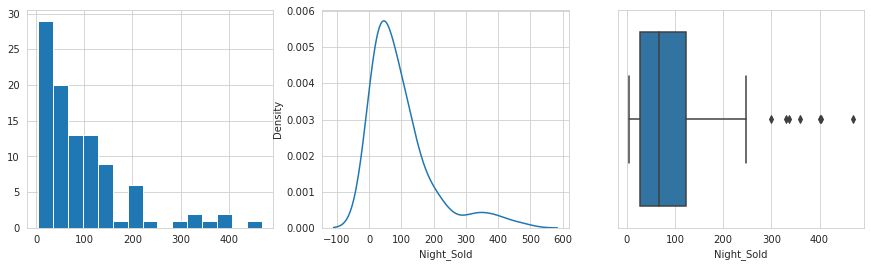

In [222]:
fig,ax = plt.subplots(1,3,figsize=(15,4))
ax[0].hist(x=hotels.Night_Sold, bins=15)
sns.boxplot(x=hotels.Night_Sold, ax=ax[2])
sns.kdeplot(x=hotels.Night_Sold, ax=ax[1]);

### check Hotel Score distribution and 5 number summary 


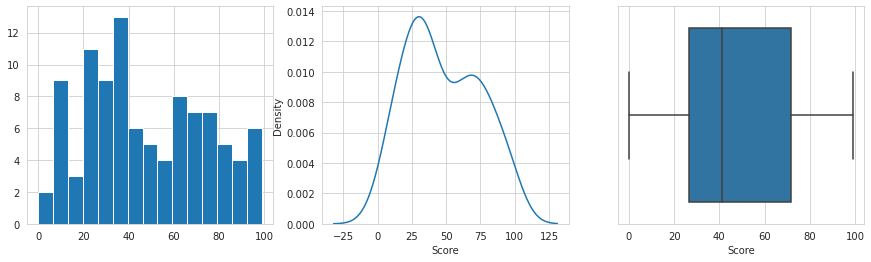

In [224]:
fig,ax = plt.subplots(1,3,figsize=(15,4))
ax[0].hist(x=hotels.Score, bins=15)
sns.boxplot(x=hotels.Score, ax=ax[2])
sns.kdeplot(x=hotels.Score, ax=ax[1]);

### Research Question 1
> ####  Which Country has the highest average hotel score? (top 10)

In [36]:
# Top 10 countries with highest hotel score on avreage

contry_avg_score = hotels.groupby("Country").Score.mean().sort_values(ascending=False).iloc[:10]

contry_avg_score

Country
Canada         98.0
Zambia         98.0
Ecuador        87.0
Brazil         84.0
Chile          76.0
Philippines    75.0
Japan          74.0
Singapore      72.0
New Mexico     72.0
Kenya          64.0
Name: Score, dtype: float64

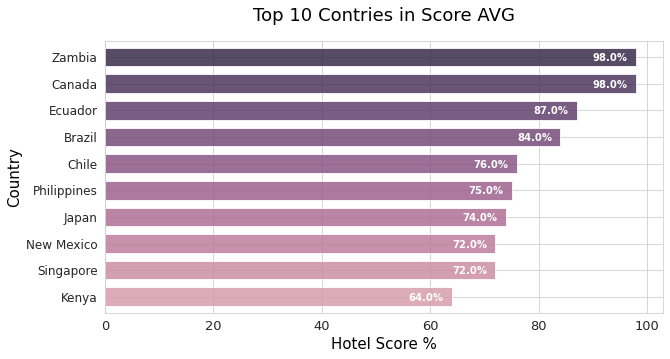

In [151]:
# Bar chart for Top 10 countries with highest hotel score on avreage


c = sns.cubehelix_palette(13)[3:]
contry_avg_score.sort_values(ascending=True).plot(kind="barh",
                                                 rot = 0,
                                                 width = 0.7,
                                                 alpha = 0.8,
                                                 fontsize = 12,
                                                 color=c,
                                                 figsize=(10,5)
                                                )
y=contry_avg_score.sort_values(ascending=True)
for i, v in enumerate(y):
    plt.text(v - 8, i-0.15 , str(v)+'%', color='white', fontweight='bold')

plt.xlabel("Hotel Score %",fontsize=15, color="k")
plt.ylabel("Country",fontsize=15, color="k")
plt.title("Top 10 Contries in Score AVG", fontsize=18, color="k", pad=20)
plt.xticks( fontsize=13);

### Answer 1

**From above visualization we can conclude that:**

   - The Top 10 countries with highest average hotel score are:
       
            - Canada         98 %
            - Zambia         98 %
            - Ecuador        87 %
            - Brazil         84 %
            - Chile          76 %
            - Philippines    75 %
            - Japan          74 %
            - Singapore      72 %
            - New Mexico     72 %
            - Kenya          64 %

### Research Question 2
> #### Which Country has the most average sold nights? (top 10)

In [108]:
# Top 10 countries with highest average sold nights

nights_sold_avg = hotels.groupby("Country").Night_Sold.mean().sort_values(ascending=False).iloc[:10]

nights_sold_avg

Country
Philippines    469.000000
Singapore      400.000000
Japan          360.000000
Thailand       235.250000
India          165.416667
Switzerland    157.000000
China          120.500000
England        117.750000
Turkey         106.333333
Mexico         104.428571
Name: Night_Sold, dtype: float64

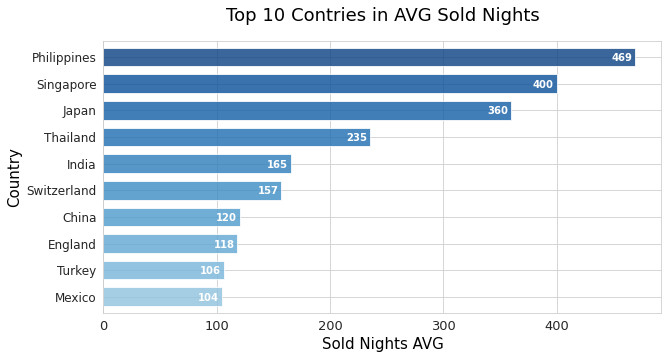

In [110]:
# Bar chart for Top 10 countries with highest average sold nights 

c = sns.color_palette("Blues", 16)[6:]
nights_sold_avg.sort_values(ascending=True).plot(kind="barh",
                                                 rot = 0,
                                                 width = 0.7,
                                                 alpha = 0.8,
                                                 fontsize = 12,
                                                 color=c,
                                                 figsize=(10,5)
                                                )

y=nights_sold_avg.sort_values(ascending=True)
y = [round(i) for i in y]
for i, v in enumerate(y):
    plt.text(v - 21, i-0.15 , str(v), color='white', fontweight='bold')

plt.xlabel("Sold Nights AVG",fontsize=15, color="k")
plt.ylabel("Country",fontsize=15, color="k")
plt.title("Top 10 Contries in AVG Sold Nights", fontsize=18, color="k", pad=20)
plt.xticks( fontsize=13);

### Answer 2

**From above visualization we can conclude that:**

   - The  Top 10 countries with highest average sold nights are:

            - Philippines    469
            - Singapore      400
            - Japan          360
            - Thailand       235
            - India          165
            - Switzerland    157
            - China          121
            - England        118
            - Turkey         106
            - Mexico         104


### Research Question 3
> #### Which Country has the most total sold nights? (top 10)

In [85]:
# Top 10 countries with highest total Night_Sold


nights_sold_sum = hotels.groupby("Country").Night_Sold.sum().sort_values(ascending=False).iloc[:10]

nights_sold_sum

Country
India          1985
Thailand        941
France          749
Mexico          731
England         471
Philippines     469
USA             433
Singapore       400
Italy           369
Japan           360
Name: Night_Sold, dtype: int64

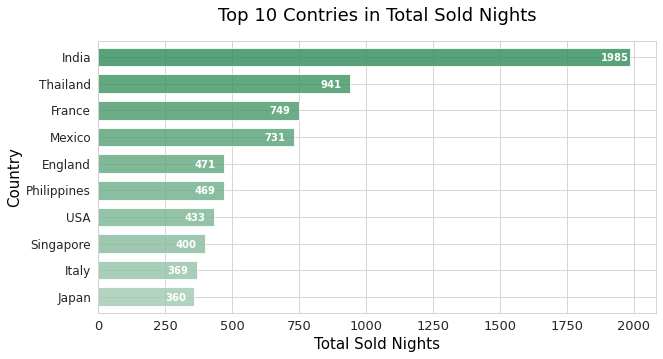

In [111]:
# Bar chart for Top 10 countries with highest total sold nights

c=sns.light_palette("seagreen",16)[6:]
nights_sold_sum.sort_values(ascending=True).plot(kind="barh",
                                                 rot = 0,
                                                 width = 0.7,
                                                 alpha = 0.8,
                                                 fontsize = 12,
                                                 color=c,
                                                 figsize=(10,5)
                                                )
y=nights_sold_sum.sort_values(ascending=True)
for i, v in enumerate(y):
    plt.text(v - 109, i-0.15 , str(v), color='white', fontweight='bold')

plt.xlabel("Total Sold Nights",fontsize=15, color="k")
plt.ylabel("Country",fontsize=15, color="k")
plt.title("Top 10 Contries in Total Sold Nights", fontsize=18, color="k", pad=20)
plt.xticks( fontsize=13);

### Answer 3

**From above visualization we can conclude that:**

   - The  Top 10 countries with highest total sold nights are:

            - India          1985
            - Thailand        941
            - France          749
            - Mexico          731
            - England         471
            - Philippines     469
            - USA             433
            - Singapore       400
            - Italy           369
            - Japan           360


### Research Question 4
> #### Which Theme has the highest average hotel score?

In [112]:
# Top 10 Themes with highest avreage hotel score

theme_avg_score = hotels.groupby("Theme").Score.mean().sort_values(ascending=True)
theme_avg_score

Theme
Contemporary     40.000000
Nature           43.250000
Palace           46.812500
Coastal          51.814815
Safari           52.545455
Island           60.000000
Name: Score, dtype: float64

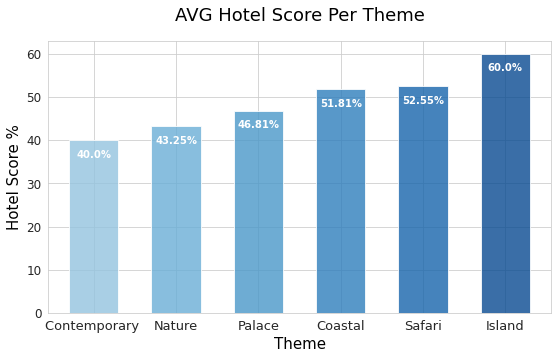

In [225]:
# Bar chart for Top 10 Themes with highest avreage hotel score


c = sns.color_palette("Blues", 9)[3:]
theme_avg_score.sort_values(ascending=True).plot(kind="bar",
                                                 rot = 0,
                                                 width = 0.6,
                                                 alpha = 0.8,
                                                 fontsize = 12,
                                                 color=c,
                                                 figsize=(9,5)
                                                )
y = theme_avg_score.sort_values(ascending=True)
y = [round(i,2) for i in y]
for i, v in enumerate(y):
    plt.text( i ,v-4, str(v)+"%", color='white', fontweight='bold', ha='center' )
    
plt.ylabel("Hotel Score %",fontsize=15, color="k")
plt.xlabel("Theme",fontsize=15, color="k")
plt.title("AVG Hotel Score Per Theme", fontsize=18, color="k", pad=20)
plt.xticks( fontsize=13);

### Answer 4

**From above visualization we can conclude that:**

   - The average hotel score per theme:

            - Island           60.00 %
            - Safari           52.55 %
            - Coastal          51.81 %
            - Palace           46.81 %
            - Nature           43.25 %
            - Contemporary     40.00 %
     

### Research Question 5
> #### Which Theme has the most average sold nights? 

In [158]:
# highest Night_Sold on avreage per theme

theme_nights_avg = hotels.groupby("Theme").Night_Sold.mean().sort_values(ascending=False)

theme_nights_avg

Theme
Palace           172.625000
Contemporary     157.444444
Coastal           78.777778
Island            71.428571
Nature            56.750000
Safari            13.363636
Name: Night_Sold, dtype: float64

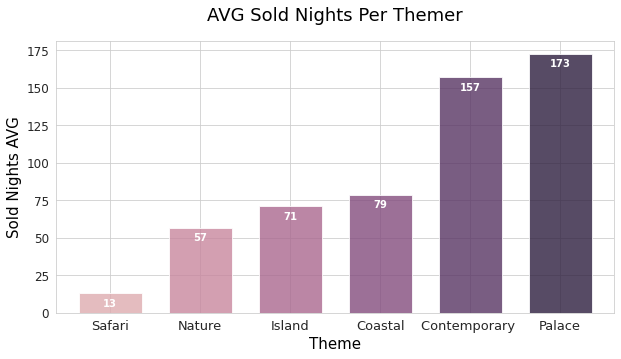

In [185]:
# Bar chart for highest Night_Sold on avreage per theme


c = sns.cubehelix_palette(7)[1:]
theme_nights_avg.sort_values(ascending=True).plot(kind="bar",
                                                 rot = 0,
                                                 width = 0.7,
                                                 alpha = 0.8,
                                                 fontsize = 12,
                                                 color=c,
                                                 figsize=(10,5)
                                                )
y = theme_nights_avg.sort_values(ascending=True)
y = [round(i) for i in y]
for i, v in enumerate(y):
    plt.text( i ,v-9, str(v), color='white', fontweight='bold', ha='center' )

plt.ylabel("Sold Nights AVG",fontsize=15, color="k")
plt.xlabel("Theme",fontsize=15, color="k")
plt.title("AVG Sold Nights Per Themer", fontsize=18, color="k", pad=20)
plt.xticks( fontsize=13);

### Answer 5

**From above visualization we can conclude that:**

   - The average Sold nights per theme:

            - Palace           173
            - Contemporary     157
            - Coastal           79
            - Island            71
            - Nature            57
            - Safari            13


### Research Question 6
> #### Which Theme has the most total sold nights?

In [173]:
# highest total Night_Sold per theme


theme_nights_sum = hotels.groupby("Theme").Night_Sold.sum().sort_values(ascending=False)
theme_nights_sum

Theme
Contemporary     2834
Palace           2762
Coastal          2127
Nature           1135
Island            500
Safari            147
Name: Night_Sold, dtype: int64

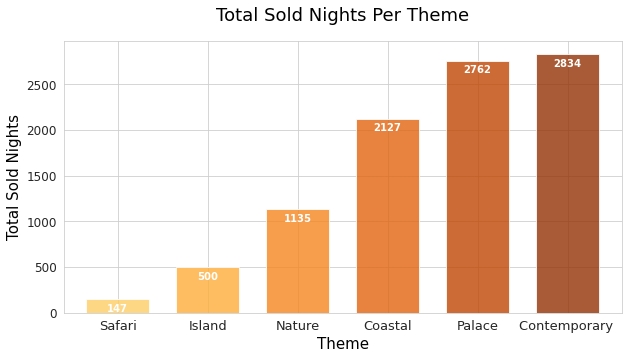

In [184]:
# Bar chart for # highest total Night_Sold per theme


c=sns.color_palette("YlOrBr", 8)[2:]
theme_nights_sum.sort_values(ascending=True).plot(kind="bar",
                                                 rot = 0,
                                                 width = 0.7,
                                                 alpha = 0.8,
                                                 fontsize = 12,
                                                 color=c,
                                                 figsize=(10,5)
                                                )

y = theme_nights_sum.sort_values(ascending=True)
for i, v in enumerate(y):
    plt.text( i ,v-138, str(v), color='white', fontweight='bold', ha='center' )
    
    
plt.ylabel("Total Sold Nights",fontsize=15, color="k")
plt.xlabel("Theme",fontsize=15, color="k")
plt.title("Total Sold Nights Per Theme", fontsize=18, color="k", pad=20)
plt.xticks( fontsize=13);

### Answer 6

**From above visualization we can conclude that::**

   - The total sold nights per themes:

            - Contemporary     2834
            - Palace           2762
            - Coastal          2127
            - Nature           1135
            - Island            500
            - Safari            147


### Research Question 7
> #### Is there any correlation between hotel score and sold nights?

In [194]:
# Check correlation 

hotels.corr()

,Hotel_ID,Night_Sold,Score
Hotel_ID,1.000000,0.045509,-0.018765
Night_Sold,0.045509,1.000000,-0.036645
Score,-0.018765,-0.036645,1.000000


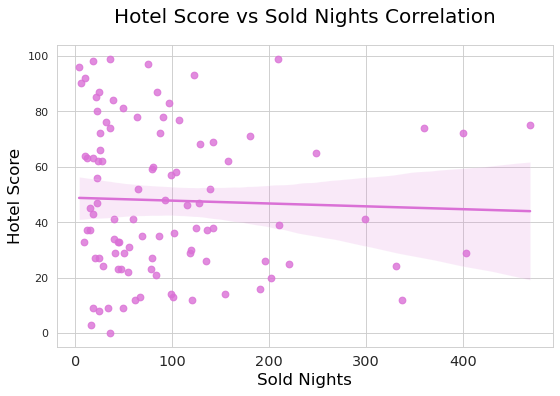

In [195]:
#Scatter Plot for Hotel Score vs Sold Nights 

plt.figure(figsize=(8, 5), dpi=80)
sns.regplot(data=hotels, x='Night_Sold' , y="Score", color="orchid")
plt.xlabel("Sold Nights",fontsize=15, color="k")
plt.ylabel("Hotel Score",fontsize=15, color="k")
plt.title("Hotel Score vs Sold Nights Correlation", fontsize=18, color="k", pad=20)
plt.xticks( fontsize=13);

### Answer 7

**From above visualization we can conclude that:**

   - There is no Correlation between Hotel Score and Hotel Sold Nights.

<a id='conclusions'></a>
## Conclusions

> **1. Canada, Zambia and Ecuador are the top 3 countries with highest average hotel score.**

       - Canada      98%
       - Zambia      98%
       - Ecuador     87%
       - Brazil      84%
       - Chile       76%
       - Philippines 75%
       - Japan       74%
       - Singapore   72%
       - New Mexico  72%
       - Kenya       64%


> **2. Island and Safari are the top Themes with highest average hotel score.**


        - Island           60.00%
        - Safari           52.55%
        - Coastal          51.81%
        - Palace           46.81%
        - Nature           43.25%
        - Contemporary     40.00%
        

> **3. Philippines, Singapore and Japan are the top 3 countries with with highest average sold nights.**


       - Philippines    469 Nights
       - Singapore      400
       - Japan          360
       - Thailand       235
       - India          165
       - Switzerland    157
       - China          121
       - England        118
       - Turkey         106
       - Mexico         104

> **4. Palace and Contemporary are the top Themes with highest average Sold nights.**


       - Palace            173 Nights
       - Contemporary      157
       - Coastal           79
       - Island            71
       - Nature            57
       - Safari            13

       
> **5. India, Thailand and France are the top 3 countries with with highest total sold nights.**


       - India           1985 Nights
       - Thailand        941
       - France          749
       - Mexico          731
       - England         471
       - Philippines     469
       - USA             433
       - Singapore       400
       - Italy           369
       - Japan           360



       
> **6. Contemporary and Palace are the top Themes with highest total sold nights.**


       - Contemporary     2834 Nights
       - Palace           2762
       - Coastal          2127
       - Nature           1135
       - Island            500
       - Safari            147
       

> **7. There is no Correlation between Hotel Score and Hotel Sold Nights.**
